ANALYSIS OF SIMULATED COSMIC MICROWAVE BACKGROUND POLARIZATION DATA 
----------------

import libraries
----------------

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import camb
import healpy as hp
import pymaster as nmt
from matplotlib.colors import *
from matplotlib.colors import LogNorm
import matplotlib.colors as mcolors
from scipy.optimize import minimize
import emcee
import corner
import scipy.stats
import seaborn as sns

plt.style.use('dark_background')

Cosmological parameters initialization
---------------

In [2]:
nside = 256

lmax = 2*nside

r0 = 0.005 
omega_b0 = 0.022
H00 = 67.5
ns0 = 0.965
tau0 = 0.06
As0 = 2e-9

pars = camb.CAMBparams() 
pars.set_cosmology(H0=H00, ombh2=omega_b0, omch2=0.122, mnu=0.06, omk=0, tau=tau0)
pars.InitPower.set_params(As=As0, ns=ns0, r=r0)
pars.set_for_lmax(lmax, lens_potential_accuracy=1);
pars.WantTensors = True
results = camb.get_results(pars)
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK', lmax=lmax)

Plots of ($C_\ell^{TT}$, $C_\ell^{EE}$, $C_\ell^{BB}$, $C_\ell^{TE}$) with key 'total' : all contributions are used (tensor, lens_potential etc...). In $\Lambda$CDM model.  
---------------------

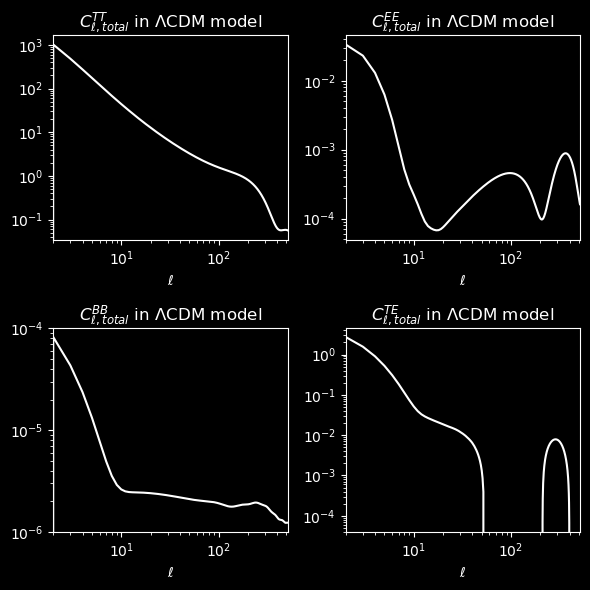

In [3]:
totCL = powers['total']
ls = np.arange(totCL.shape[0])
u = (ls*(ls+1))/(2*np.pi)
u[0] = 1

# TT Field
clTT = totCL[:, 0] / u
plt.figure(figsize=(6, 6))
plt.subplot(2, 2, 1)
plt.loglog(ls, clTT, color='w')
plt.title('$C_{\ell, total}^{TT}$ in $\Lambda$CDM model')
plt.xlabel(r'$\ell$')
plt.xlim([2, lmax])

# EE Field
clEE = totCL[:, 1] / u
plt.subplot(2, 2, 2)
plt.loglog(ls, clEE, color='w')
plt.title('$C_{\ell, total}^{EE}$ in $\Lambda$CDM model')
plt.xlabel(r'$\ell$')
plt.xlim([2, lmax])

# BB Field
clBB = totCL[:, 2] / u
plt.subplot(2, 2, 3)
plt.loglog(ls, clBB, color='w')
plt.title('$C_{\ell, total}^{BB}$ in $\Lambda$CDM model')
plt.xlabel(r'$\ell$')
plt.xlim([2, lmax])


# TE Field
clTE = totCL[:, 3] / u
plt.subplot(2, 2, 4)
plt.loglog(ls, clTE, color='w')
plt.title('$C_{\ell, total}^{TE}$ in $\Lambda$CDM model')
plt.xlabel(r'$\ell$')
plt.xlim([2, lmax])
plt.tight_layout()
plt.show()

Plots of ($C_\ell^{TT}$, $C_\ell^{EE}$, $C_\ell^{BB}$, $C_\ell^{TE}$) with key 'total' : all contributions are used (tensor, lens_potential etc...) and study of some cosmological dependencies
----------------------

With Baryons : 

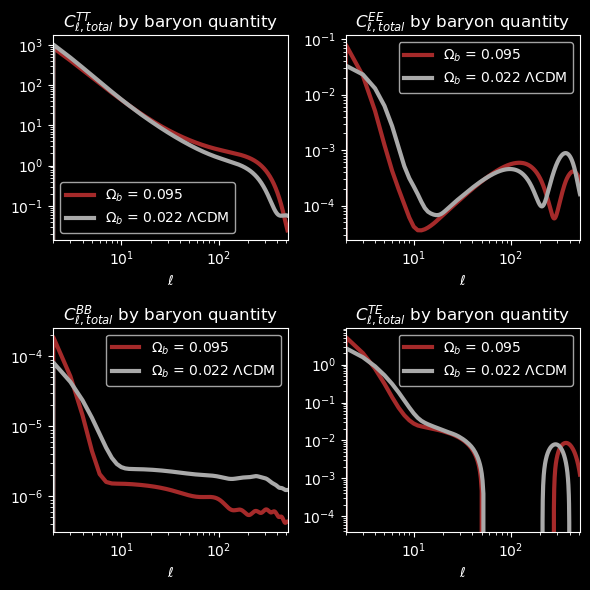

In [283]:
omega_b = [0.095]

for i in omega_b : 
    pars = camb.CAMBparams() 
    pars.set_cosmology(H0=H00, ombh2=i, omch2=0.122, mnu=0.06, omk=0, tau=tau0)
    pars.InitPower.set_params(As=As0, ns=ns0, r=r0)
    pars.set_for_lmax(lmax, lens_potential_accuracy=1);
    pars.WantTensors = True
    results = camb.get_results(pars)
    powers =results.get_cmb_power_spectra(pars, CMB_unit='muK', lmax=lmax)
    totCLtest = powers['total']
    ls = np.arange(totCL.shape[0])
    u = (ls*(ls+1))/(2*np.pi)
    u[0] = 1
    # TT Field
    clTTr = totCLtest[:, 0] / u
    plt.figure(figsize=(6, 6))
    plt.subplot(2, 2, 1)
    plt.loglog(ls, clTTr, color='brown', label='$\Omega_b$ = '+str(omega_b[0]), linewidth = 3)
    plt.loglog(ls, clTT, color='darkgrey', label='$\Omega_b$ = '+str(omega_b0)+' $\Lambda$CDM',linewidth = 3)
    plt.title('$C_{\ell, total}^{TT}$ by baryon quantity ')
    plt.xlabel(r'$\ell$')
    plt.xlim([2, lmax])
    plt.legend()
    # EE Field
    clEEr = totCLtest[:, 1] / u
    plt.subplot(2, 2, 2)
    plt.loglog(ls, clEEr, color='brown', label='$\Omega_b$ = '+str(omega_b[0]), linewidth = 3)
    plt.loglog(ls, clEE, color='darkgrey', label='$\Omega_b$ = '+str(omega_b0)+' $\Lambda$CDM', linewidth = 3)
    plt.title('$C_{\ell, total}^{EE}$ by baryon quantity ')
    plt.xlabel(r'$\ell$')
    plt.xlim([2, lmax])
    plt.legend()
    # BB Field
    clBBr = totCLtest[:, 2] / u 
    plt.subplot(2, 2, 3)
    plt.loglog(ls, clBBr, color='brown', label='$\Omega_b$ = '+str(omega_b[0]), linewidth = 3)
    plt.loglog(ls, clBB, color='darkgrey', label='$\Omega_b$ = '+str(omega_b0) +' $\Lambda$CDM', linewidth = 3)
    plt.title('$C_{\ell, total}^{BB}$ by baryon quantity ')
    plt.xlabel(r'$\ell$')
    plt.xlim([2, lmax])
    plt.legend()
    # TE Field
    clTEr = totCLtest[:, 3] / u
    plt.subplot(2, 2, 4)
    plt.loglog(ls, clTEr, color='brown', label='$\Omega_b$ = '+str(omega_b[0]), linewidth = 3)
    plt.loglog(ls, clTE, color='darkgrey', label='$\Omega_b$ = '+str(omega_b0) +' $\Lambda$CDM', linewidth = 3)
    plt.title('$C_{\ell, total}^{TE}$ by baryon quantity ')
    plt.xlabel(r'$\ell$')
    plt.xlim([2, lmax])
    plt.legend()
    plt.tight_layout()
    plt.show()

With optical depth : 

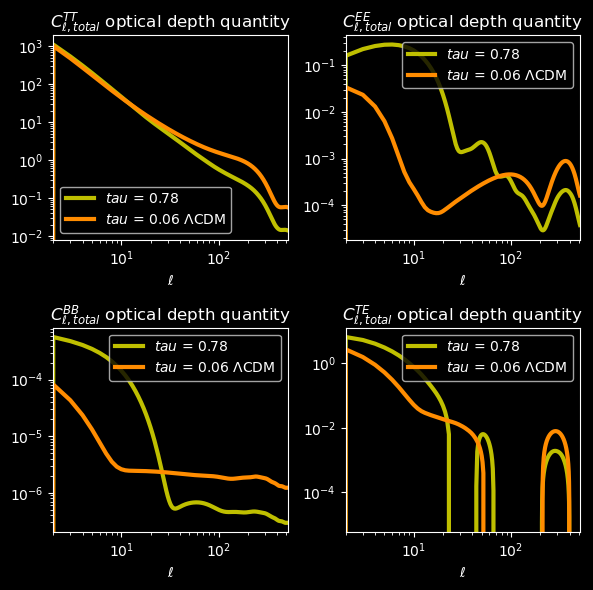

In [284]:
tau = [0.78]

for i in tau : 
    pars = camb.CAMBparams() 
    pars.set_cosmology(H0=H00, ombh2=omega_b0, omch2=0.122, mnu=0.06, omk=0, tau=i)
    pars.InitPower.set_params(As=As0, ns=ns0, r=r0)
    pars.set_for_lmax(lmax, lens_potential_accuracy=1);
    pars.WantTensors = True
    results = camb.get_results(pars)
    powers =results.get_cmb_power_spectra(pars, CMB_unit='muK', lmax=lmax)
    totCLtest = powers['total']
    ls = np.arange(totCL.shape[0])
    u = (ls*(ls+1))/(2*np.pi)
    u[0] = 1
    # TT Field
    clTTr = totCLtest[:, 0] / u
    plt.figure(figsize=(6, 6))
    plt.subplot(2, 2, 1)
    plt.loglog(ls, clTTr, color='y', label='$\ttau$ = '+str(tau[0]), linewidth = 3)
    plt.loglog(ls, clTT, color='darkorange', label='$\ttau$ = '+str(tau0)+ ' $\Lambda$CDM', linewidth = 3)
    plt.title('$C_{\ell, total}^{TT}$ optical depth quantity ')
    plt.xlabel(r'$\ell$')
    plt.xlim([2, lmax])
    plt.legend()
    # EE Field
    clEEr = totCLtest[:, 1] / u
    plt.subplot(2, 2, 2)
    plt.loglog(ls, clEEr, color='y', label='$\ttau$ = '+str(tau[0]), linewidth = 3)
    plt.loglog(ls, clEE, color='darkorange', label='$\ttau$ = '+str(tau0)+ ' $\Lambda$CDM', linewidth = 3)
    plt.title('$C_{\ell, total}^{EE}$ optical depth quantity ')
    plt.xlabel(r'$\ell$')
    plt.xlim([2, lmax])
    plt.legend()
    # BB Field
    clBBr = totCLtest[:, 2] / u
    plt.subplot(2, 2, 3)
    plt.loglog(ls, clBBr, color='y', label='$\ttau$ = '+str(tau[0]), linewidth = 3)
    plt.loglog(ls, clBB, color='darkorange', label='$\ttau$ = '+str(tau0) + ' $\Lambda$CDM', linewidth = 3)
    plt.title('$C_{\ell, total}^{BB}$ optical depth quantity ')
    plt.xlabel(r'$\ell$')
    plt.xlim([2, lmax])
    plt.legend()
    # TE Field
    clTEr = totCLtest[:, 3] / u
    plt.subplot(2, 2, 4)
    plt.loglog(ls, clTEr, color='y', label='$\ttau$ = '+str(tau[0]), linewidth = 3)
    plt.loglog(ls, clTE, color='darkorange', label='$\ttau$ = '+str(tau0) + ' $\Lambda$CDM', linewidth = 3)
    plt.title('$C_{\ell, total}^{TE}$ optical depth quantity ')
    plt.xlabel(r'$\ell$')
    plt.xlim([2, lmax])
    plt.legend()
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

With spectral index : 

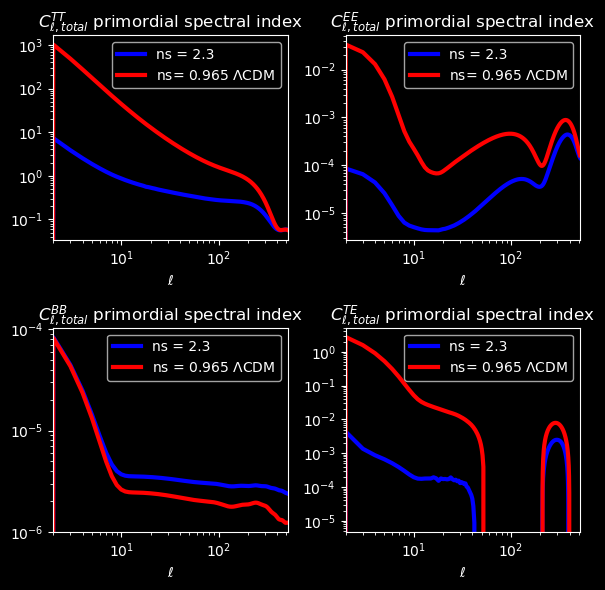

In [285]:
nss = [2.3]

for i in nss : 
    pars = camb.CAMBparams() 
    pars.set_cosmology(H0=H00, ombh2=omega_b0, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
    pars.InitPower.set_params(As=As0, ns=i, r=r0)
    pars.set_for_lmax(lmax, lens_potential_accuracy=1);
    pars.WantTensors = True
    results = camb.get_results(pars)
    powers =results.get_cmb_power_spectra(pars, CMB_unit='muK', lmax=lmax)
    totCLtest = powers['total']
    ls = np.arange(totCL.shape[0])
    u = (ls*(ls+1))/(2*np.pi)
    u[0] = 1
    # TT Field
    clTTr = totCLtest[:, 0] / u
    plt.figure(figsize=(6, 6))
    plt.subplot(2, 2, 1)
    plt.loglog(ls, clTTr, color='b', label='ns = '+str(nss[0]), linewidth = 3)
    plt.loglog(ls, clTT, color='r', label='ns= '+str(ns0)+ ' $\Lambda$CDM', linewidth = 3)
    plt.title('$C_{\ell, total}^{TT}$ primordial spectral index ')
    plt.xlabel(r'$\ell$')
    plt.xlim([2, lmax])
    plt.legend()
    # EE Field
    clEEr = totCLtest[:, 1] / u
    plt.subplot(2, 2, 2)
    plt.loglog(ls, clEEr, color='b', label='ns = '+str(nss[0]), linewidth = 3)
    plt.loglog(ls, clEE, color='r', label='ns= '+str(ns0)+ ' $\Lambda$CDM', linewidth = 3)
    plt.title('$C_{\ell, total}^{EE}$ primordial spectral index')
    plt.xlabel(r'$\ell$')
    plt.xlim([2, lmax])
    plt.legend()
    # BB Field
    clBBr = totCLtest[:, 2] / u
    plt.subplot(2, 2, 3)
    plt.loglog(ls, clBBr, color='b', label='ns = '+str(nss[0]), linewidth = 3)
    plt.loglog(ls, clBB, color='r', label='ns = '+str(ns0) + ' $\Lambda$CDM', linewidth = 3)
    plt.title('$C_{\ell, total}^{BB}$ primordial spectral index')
    plt.xlabel(r'$\ell$')
    plt.xlim([2, lmax])
    plt.legend()
    # TE Field
    clTEr = totCLtest[:, 3] / u
    plt.subplot(2, 2, 4)
    plt.loglog(ls, clTEr, color='b', label='ns = '+str(nss[0]), linewidth = 3)
    plt.loglog(ls, clTE, color='r', label='ns= '+str(ns0) + ' $\Lambda$CDM', linewidth = 3)
    plt.title('$C_{\ell, total}^{TE}$ primordial spectral index ')
    plt.xlabel(r'$\ell$')
    plt.xlim([2, lmax])
    plt.legend()
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

With tensor-to-scalar ratio : 

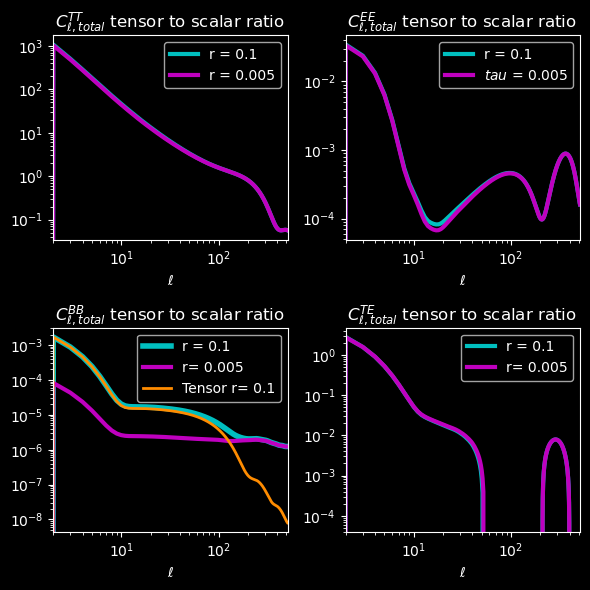

In [286]:
rr = [0.1]
plt.figure(figsize=(6, 6))
for i in rr : 
    pars = camb.CAMBparams() 
    pars.set_cosmology(H0=H00, ombh2=omega_b0, omch2=0.122, mnu=0.06, omk=0, tau=tau0)
    pars.InitPower.set_params(As=As0, ns=ns0, r=i)
    pars.set_for_lmax(lmax, lens_potential_accuracy=1);
    pars.WantTensors = True
    results = camb.get_results(pars)
    powers =results.get_cmb_power_spectra(pars, CMB_unit='muK', lmax=lmax)
    totCLtest = powers['total']
    ls = np.arange(totCL.shape[0])
    u = (ls*(ls+1))/(2*np.pi)
    u[0] = 1
    # TT Field
    clTTr = totCLtest[:, 0] / u
    plt.subplot(2, 2, 1)
    plt.loglog(ls, clTTr, color='c', label='r = '+str(rr[0]), linewidth = 3)
    plt.loglog(ls, clTT, color='m', label='r = '+str(r0), linewidth = 3)
    plt.title('$C_{\ell, total}^{TT}$ tensor to scalar ratio ')
    plt.xlabel(r'$\ell$')
    plt.xlim([2, lmax])
    plt.legend()
    # EE Field
    clEEr = totCLtest[:, 1] / u
    plt.subplot(2, 2, 2)
    plt.loglog(ls, clEEr, color='c', label='r = '+str(rr[0]), linewidth = 3)
    plt.loglog(ls, clEE, color='m', label='$\ttau$ = '+str(r0), linewidth = 3)
    plt.title('$C_{\ell, total}^{EE}$ tensor to scalar ratio ')
    plt.xlabel(r'$\ell$')
    plt.xlim([2, lmax])
    plt.legend()
    # BB Field
    clBBr = totCLtest[:, 2] / u
    clBBtensorr = powers['tensor'][:, 2] / u 
    plt.subplot(2, 2, 3)
    plt.loglog(ls, clBBr, color='c', label='r = '+str(rr[0]), linewidth = 4)
    plt.loglog(ls, clBB, color='m', label='r= '+str(r0), linewidth = 3)
    plt.loglog(ls, clBBtensorr, color='darkorange', label='Tensor r= '+str(rr[0]), linewidth = 2)
    plt.title('$C_{\ell, total}^{BB}$ tensor to scalar ratio ')
    plt.xlabel(r'$\ell$')
    plt.xlim([2, lmax])
    plt.legend()
    # TE Field
    clTEr = totCLtest[:, 3] / u
    plt.subplot(2, 2, 4)
    plt.loglog(ls, clTEr, color='c', label='r = '+str(rr[0]), linewidth = 3)
    plt.loglog(ls, clTE, color='m', label='r= '+str(r0), linewidth = 3)
    plt.title('$C_{\ell, total}^{TE}$ tensor to scalar ratio ')
    plt.xlabel(r'$\ell$')
    plt.xlim([2, lmax])
    plt.legend()
    plt.tight_layout()
    plt.show()

Plot of $C^{BB}_{\ell, lensing}$ which will be useful in the rest of the code 
----------------------------------------------------------------------------

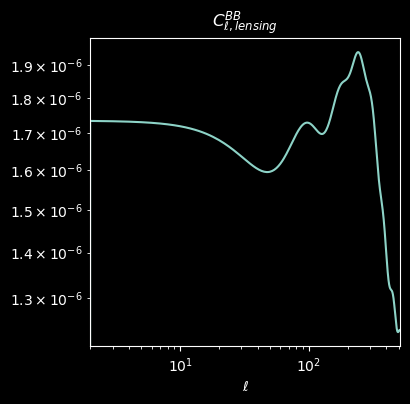

In [4]:
plt.figure(figsize = (4,4))

Alens0 = 1

def lensing_spectrum(Alens):
    pars = camb.CAMBparams()
    pars.set_cosmology(H0=H00, ombh2=omega_b0, omch2=0.122, mnu=0.06, omk=0, tau=tau0)
    pars.InitPower.set_params(As=As0, ns=ns0, r=r0)
    pars.set_for_lmax(lmax, lens_potential_accuracy=1)
    pars.WantTensors = True
    pars.Alens = Alens

    results = camb.get_results(pars)
    powers = results.get_cmb_power_spectra(pars, CMB_unit='muK', lmax = lmax)
    totCL = powers['total']
    ls = np.arange(totCL.shape[0])
    u = (ls*(ls+1))/(2*np.pi)
    u[0] = 1

    clLensed = powers['lensed_scalar'][:, 2]/u 

    return clLensed

clLens = lensing_spectrum(Alens0)
plt.xlim([2,lmax])
plt.title('$C^{BB}_{\ell, lensing}$')
plt.xlabel('$\ell$')
plt.loglog(ls, clLens)

We can generate the maps (T,Q,U) using synfast from the Healpy library : 
--------------------

In [5]:
noise_level = 1e-10

maps = hp.synfast((clTT + noise_level , clEE + noise_level , clBB + noise_level , clTE + noise_level ),
                  nside, new=True)  # order is  (TT, EE, BB, TE) 

maps_with_noise = maps   

Plot of maps with noise : 
---------------------

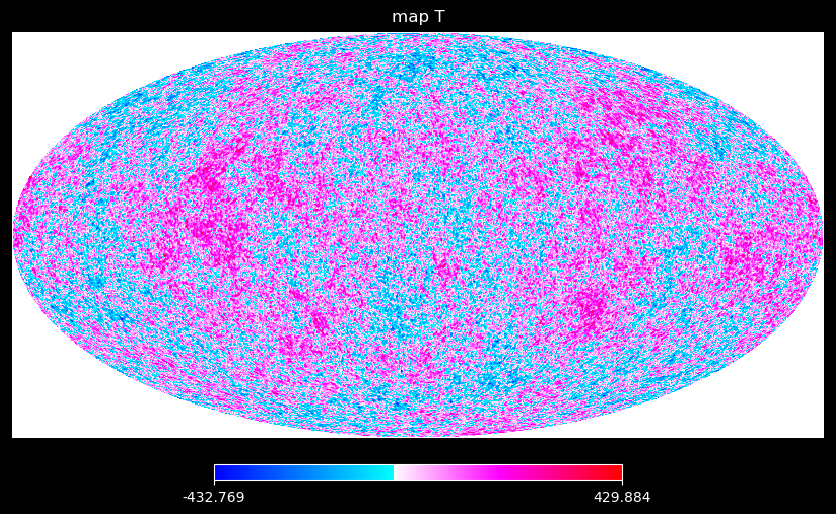

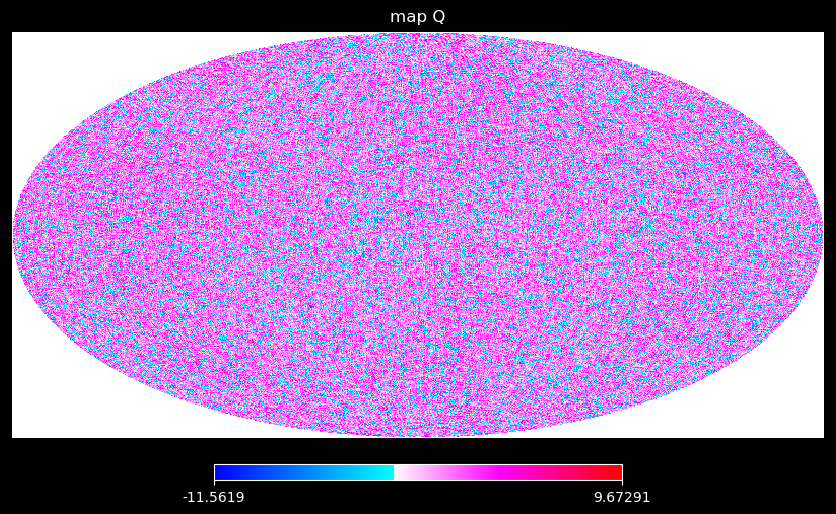

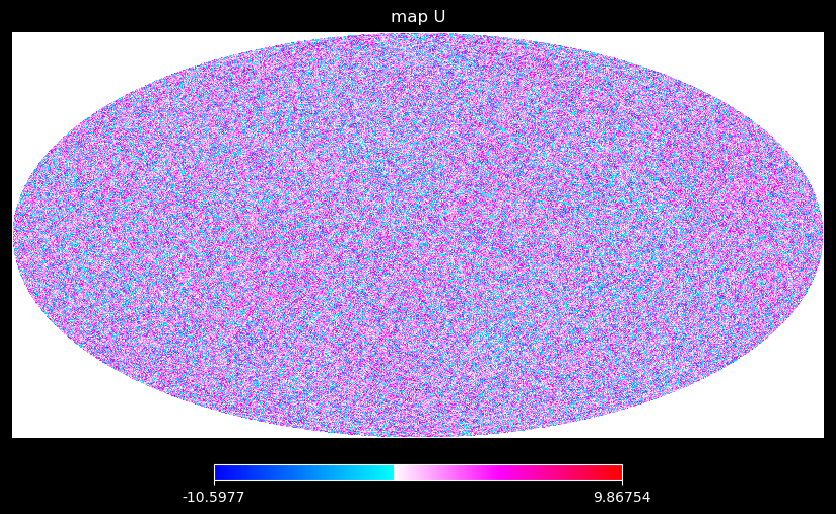

In [30]:
def make_colormap(seq):
    """Return a LinearSegmentedColormap
    seq: a sequence of floats and RGB-tuples. The floats should be increasing
    and in the interval (0,1).
    """
    seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    return mcolors.LinearSegmentedColormap('CustomMap', cdict)
c = mcolors.ColorConverter().to_rgb
rvb = make_colormap(
    [c('blue'), c('cyan'),0.44, c('white'), c('magenta'),0.7,c('magenta'),c('red'),c('red'),c('red')])



hp.mollview(maps_with_noise[0], title='map T',cmap = rvb)

hp.mollview(maps_with_noise[1], title='map Q',cmap = rvb)

hp.mollview(maps_with_noise[2], title='map U',cmap = rvb)

And so we can get the data simulated from maps with Healpy's anafast, here called 'cl_reconstruit' : 
----------------------

In [6]:
cl_reconstruit = hp.anafast(maps_with_noise, lmax=lmax)

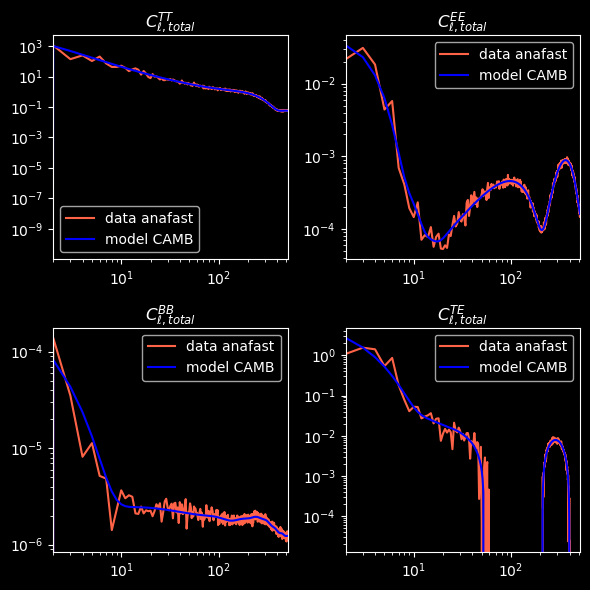

In [7]:
import numpy as np
import matplotlib.pyplot as plt


plt.figure(figsize=(6, 6))

plt.subplot(2, 2, 1)
plt.loglog(ls, cl_reconstruit[0], color='tomato', label='data anafast')
plt.loglog(ls, clTT, label='model CAMB', color='blue')
plt.xlim([2, lmax])
plt.title('$C_{\ell, total}^{TT}$')
plt.legend()

plt.subplot(2, 2, 2)
plt.loglog(ls, cl_reconstruit[1], color='tomato', label='data anafast')
plt.loglog(ls, clEE, label='model CAMB', color='blue')
plt.xlim([2, lmax])
plt.title('$C_{\ell, total}^{EE}$')
plt.legend()

plt.subplot(2, 2, 3)
clReconstruitBB = cl_reconstruit[2]
plt.loglog(ls, clReconstruitBB, color='tomato', label='data anafast')
plt.loglog(ls, clBB, label='model CAMB', color='blue')
plt.xlim([2, lmax])
plt.title('$C_{\ell, total}^{BB}$')
plt.legend()

plt.subplot(2, 2, 4)
plt.loglog(ls, cl_reconstruit[3], color='tomato', label='data anafast')
plt.loglog(ls, clTE, label='model CAMB', color='blue')
plt.xlim([2, lmax])
plt.title('$C_{\ell, total}^{TE}$')
plt.legend()

plt.tight_layout()
plt.show()


Plot of $C^{BB}_{\ell, Tensor}$ which will be useful in the rest of the code (for the likelihood)
----------------------------------------------------------------------------

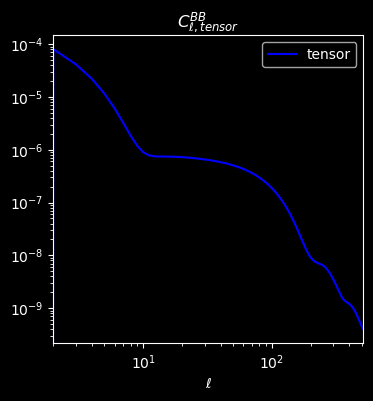

In [8]:
totCL = powers['tensor']

clTensor = totCL[:, 2]/u
plt.figure(figsize=(4, 4))
plt.loglog(ls, clTensor, color='b', label='tensor')
plt.xlim([2,lmax])
plt.title('$C_{\ell, tensor}^{BB}$')
plt.xlabel(r'$\ell$')
plt.legend()
plt.show()

Part I : Full sky estimation (fsky = 1)
----------------------------------------
---------------------------------------------
---------------------------------------------

Estimation of r by gaussian Log-Likelihood minimization
---------------------------------------------------------

(for the  $C_{l}^{BB}$) : 

$$-2 \log(L) \approx \sum_{l} (2l+1)[C_{l}^{-1} D_{l} + ln(C_{l})] \approx \chi^{2}$$

$$ L \approx \exp\Big(-\left(\chi^{2} - \min(\chi^{2})\right)^{2}\Big) $$

Where $C_{l}$ is the theoretical spectrum (the model) and where $D_{l}$ is the reconstructed spectrum with white noise. 

For the covariance (the model), we can write : 

$$C_{l}(r) = \frac{1}{r_{0}} r  C_{l, tensor}^{BB}(r = r_{0}) + C_{l,lensing}^{BB} + N_{l}$$

In [9]:
def likelihood(r):
    clTh =  clTensor * r / r0 + noise_level + clLens 
    somme = np.sum((2*ls[2:]+1)*((clReconstruitBB[2:]/clTh[2:])+ np.log(clTh[2:])))
    return somme

res = minimize(likelihood, x0=r0, method='Nelder-Mead')
optimal_rBruit = res.x[0]

print("The estimation of r is :", optimal_rBruit)

The estimation of r is : 0.0056328125


Estimation of r by exact Log-Likelihood minimization
---------------------------------------------------------
the covariance is identical, but the likelihood is written slightly differently : 

$$-2 \log(L) \approx \sum_{l} (2l+1)[C_{l}^{-1} D_{l} - ln(C_{l}^{-1} D_{l}) -1] \approx \chi^{2}$$


In [10]:
def exact_likelihood(r):
    clTh =  clTensor * r / r0 + noise_level + clLens 
    somme = np.sum((2*ls[2:]+1)*((clReconstruitBB[2:]/clTh[2:])- np.log(clReconstruitBB[2:]/clTh[2:])-1))
    return somme

resExact = minimize(exact_likelihood, x0=r0, method='Nelder-Mead')
optimal_rExact = resExact.x[0]

print("The estimation of r is :", optimal_rExact)

The estimation of r is : 0.0056328125


Plot and comparison of the two likelihoods :  
---------------------

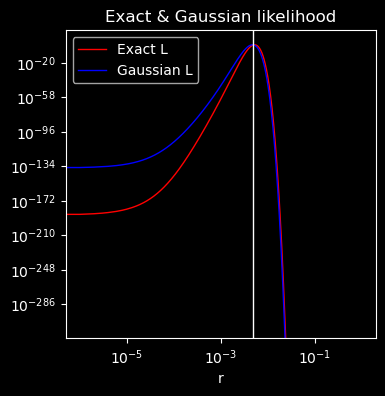

In [22]:
r = np.linspace(0, 1, 1000000)
num_likelihoods = 1



SOLgauss = []
for _ in range(num_likelihoods):
    noise_level = 1e-10
    maps = hp.synfast((clTT + noise_level , clEE + noise_level , clBB + noise_level , clTE + noise_level ),
                  nside, new=True) # l'ordre est (TT, EE, BB, TE) 
    maps_with_noise = maps   
    cl_reconstruit = hp.anafast(maps_with_noise, lmax=lmax)
    clReconstruitBB = cl_reconstruit[2]
    for j in r:
        clTh = clTensor * j / r0 + noise_level + clLens 
        somme =  np.sum((2*ls[2:]+1)*((clReconstruitBB[2:]/clTh[2:])+ np.log(clTh[2:])))
        SOLgauss.append(somme)
SOLgauss = np.array(SOLgauss)
fGauss = SOLgauss - np.min(SOLgauss)




SOLexact = []
for _ in range(num_likelihoods):
    noise_level = 1e-10
    maps = hp.synfast((clTT + noise_level , clEE + noise_level , clBB + noise_level , clTE + noise_level ),
                  nside, new=True) # l'ordre est (TT, EE, BB, TE) 
    maps_with_noise = maps   
    cl_reconstruit = hp.anafast(maps_with_noise, lmax=lmax)
    clReconstruitBB = cl_reconstruit[2]
    for w in r:
        clTh = clTensor * w / r0 + noise_level + clLens 
        summ =   np.sum((2*ls[2:]+1)*((clReconstruitBB[2:]/clTh[2:])- np.log(clReconstruitBB[2:]/clTh[2:])-1))
        SOLexact.append(summ)
SOLexact = np.array(SOLexact)
fExact = SOLexact - np.min(SOLexact)



plt.figure(figsize=(4, 4))
plt.loglog(r, np.exp(-fExact/2), linewidth=1, color='red', label = 'Exact L')
plt.loglog(r, np.exp(-fGauss/2), 'blue',linewidth=1, label = 'Gaussian L')
plt.xlabel('r')
plt.title('Exact & Gaussian likelihood')
plt.legend()
plt.axvline(x=r0, color='white', linewidth=1)

plt.show()

Estimation of 2 cosmological parameters (r and Alens) using the MCMC (Markov Chains Monte Carlo) method with gaussian likelihood in full sky
--------------------------

(0.005594391487352345, 1.0008284685267386)

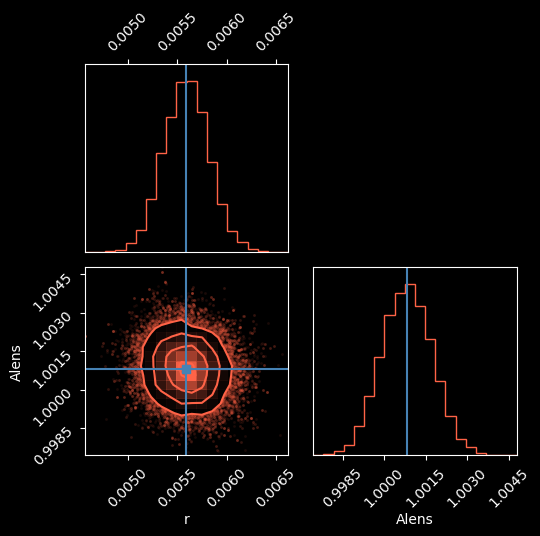

In [36]:
r_min = 0
r_max = 1
Alens_min = 0
Alens_max = 2

r_mean = r0
r_sigma = 0.001
Alens_mean = Alens0
Alens_sigma = 0.001

def prior(p):
    r, Alens = p
    r_pdf = scipy.stats.norm.pdf(r, loc=r_mean, scale=r_sigma)
    Alens_pdf = scipy.stats.norm.pdf(Alens, loc=Alens_mean, scale=Alens_sigma)
    if r_min <= r <= r_max and Alens_min <= Alens <= Alens_max :
        return  r_pdf * Alens_pdf  
    else:
        return -np.inf 

def like(p, clLens):   # Likelihood
    r, Alens = p
    clTh = r * clTensor / r0 + Alens * clLens / Alens0 + noise_level 
    sum_term = -(np.sum((2 * ls[2:] + 1) * ((clReconstruitBB[2:] / clTh[2:]) + np.log(clTh[2:]))))
    return sum_term

def prob(p, clLens):   # Posterior 
    lp = prior(p)
    if not np.isfinite(lp):
        return -np.inf
    return np.log(lp+1e-40)  + like(p, clLens)


Nwalker, Ndim =  50, 2
p0 = np.zeros((Nwalker, Ndim))
p0[:, 0] = np.random.uniform(r_min, r_max, size=Nwalker)
p0[:, 1] = np.random.uniform(Alens_min, Alens_max, size=Nwalker)

sampler = emcee.EnsembleSampler(Nwalker, Ndim, prob, args=(clLens,))
pos, prob, state = sampler.run_mcmc(p0, 500)

sampler.reset()
pos, prob, state = sampler.run_mcmc(pos, 1000)

optimal_r, optimal_Alens = np.median(sampler.flatchain, axis=0)

tmp = corner.corner(sampler.flatchain,top_ticks = True, labels=['r', 'Alens'], truths=[optimal_r, optimal_Alens], color = 'tomato')
plt.tight_layout()

optimal_r, optimal_Alens

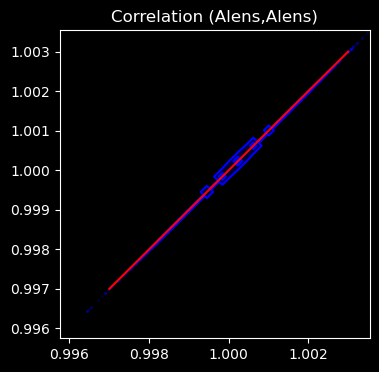

In [18]:
x = np.linspace(0.997,1.003,1000)

plt.figure(figsize = (4,4))
corner.hist2d(Alens_samples,Alens_samples, fill_contours = True, labels=['r', 'As'], truths=[optimal_r, optimal_Alens], color = 'blue')
y = x  
plt.plot(x,y, 'r')
plt.title('Correlation (Alens,Alens)')
plt.show()

Estimation results presentation in full sky  :
--------------------------

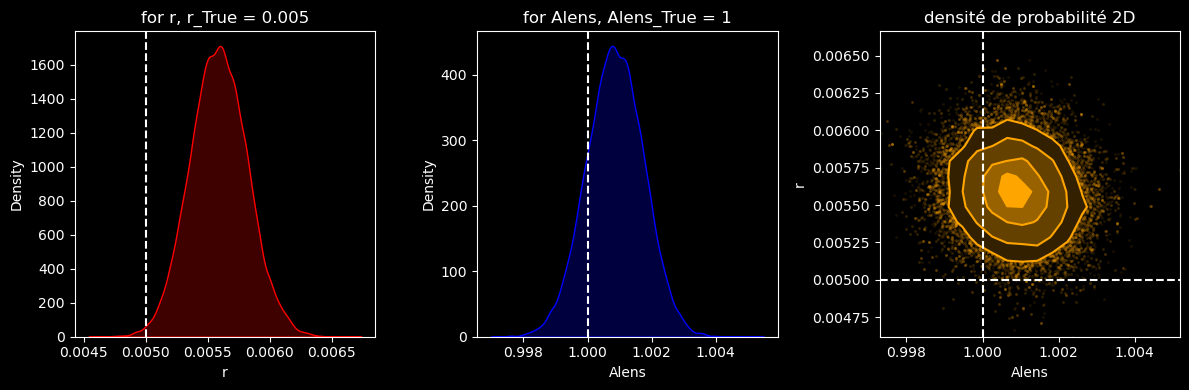

In [34]:
r_samples = sampler.flatchain[:, 0]
Alens_samples = sampler.flatchain[:, 1]

fig, axes = plt.subplots(1, 3, figsize=(12, 4))  

# for r
axes[0].set_title("for r, r_True = 0.005")
sns.kdeplot(r_samples, color='red', fill=True, ax=axes[0])
axes[0].axvline(x=r0, color='white', linestyle='--')
axes[0].set_xlabel('r')
axes[0].set_ylabel('Density')

# for Alens
axes[1].set_title("for Alens, Alens_True = 1")
sns.kdeplot(Alens_samples, color='blue', fill=True, ax=axes[1])
axes[1].axvline(x=Alens0, color='white', linestyle='--')
axes[1].set_xlabel('Alens')
axes[1].set_ylabel('Density')

# 2D field
axes[2].set_title("densité de probabilité 2D")
corner.hist2d(Alens_samples, r_samples, fill_contours=True, labels=['r', 'As'], truths=[optimal_r, optimal_Alens], color='orange', ax=axes[2])
axes[2].axvline(x=Alens0, color='white', linestyle='--')
axes[2].axhline(y=r0, color='white', linestyle='--')
axes[2].set_xlabel('Alens')
axes[2].set_ylabel('r')
plt.tight_layout()

plt.show()

Part II : Cut Sky regime
-------------------------
--------------------------------------------
--------------------------------------------

Mask definition 
----------------

calculation of a circular mask and estimation of the corresponding fsky 

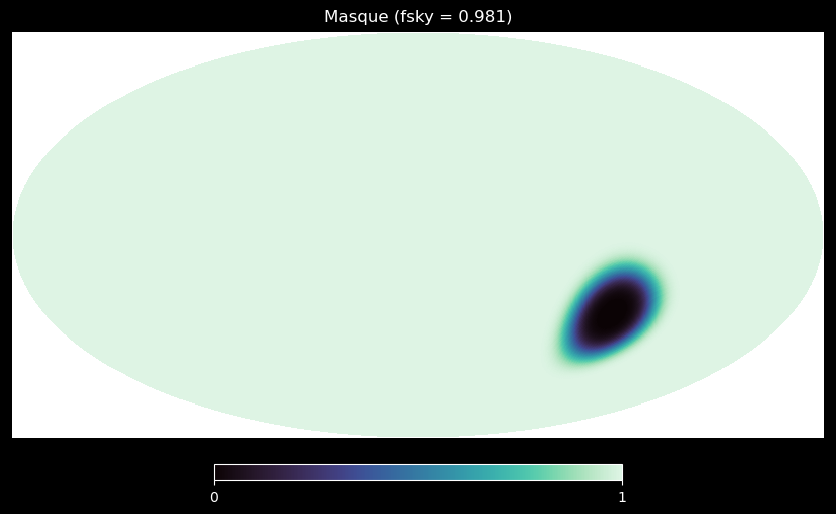

In [37]:
aposcale = 4
mask_radius = 0.1   # in radian

lon, lat = hp.pix2ang(nside, np.arange(hp.nside2npix(nside)))
mask_center_lon, mask_center_lat = 0, 0

mask_indices = hp.query_disc(nside, hp.ang2vec(mask_center_lon, mask_center_lat, lonlat=True), mask_radius)

mask = np.ones(hp.nside2npix(nside))
mask[mask_indices] = 0

# Apodization
mask = nmt.mask_apodization(mask, aposcale, apotype="Smooth")

# fsky c 
fsky = np.sum(mask) / hp.nside2npix(nside)

hp.mollview(mask, coord=['G', 'C'], title=f'Masque (fsky = {fsky:.3f})', cmap='mako')

Calculation of spin fields 0 and 2 and use of the NaMaster library to calculate coupling matrices between the various modes 
----------------

In [45]:
f0 = nmt.NmtField(mask, [maps_with_noise[0]])   # spin 0 field

f2 = nmt.NmtField(mask, [maps_with_noise[1], maps_with_noise[2]],  purify_b= True )  # spin 2 field 

nlb = 3   # Number of multipole per bins
b = nmt.NmtBin(nside, nlb = nlb, lmax = lmax)

In [46]:
cl_00 = nmt.compute_full_master(f0,f0,b)

cl_02 = nmt.compute_full_master(f0,f2,b)

cl_22 = nmt.compute_full_master(f2,f2,b)

ell_arr = b.get_effective_ells()

Plot of $C_\ell^{BB}$ reconstructed in cut sky 
----------------

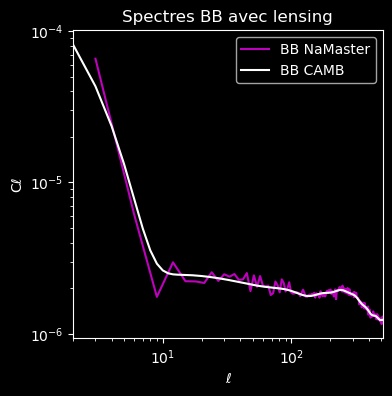

In [47]:
clBB_Nmt = cl_22[3] 
plt.figure(figsize = (4,4))
plt.loglog(ell_arr, clBB_Nmt, 'm-',label = 'BB NaMaster')
plt.loglog(ls[2:], clBB[2:],'w-', label = 'BB CAMB')
plt.xlim([2,lmax])
plt.xlabel('ℓ')
plt.ylabel('Cℓ')
plt.title('Spectres BB avec lensing')
plt.legend()
#plt.savefig('NaMaster.pdf', dpi = 1000)

delta_ell = nlb

Estimation of 2 cosmological parameters (r and Alens) using the MCMC (Markov Chains Monte Carlo) method with gaussian likelihood in cut sky
--------------------------

(We don't sum over the $\ell$ but now we sum over the bins: $\sum_{l}$ f(l) --> $\delta_{l}$ $\sum_{bin} f(bin$ )
-------------

(0.005539702483536163, 1.000788425875423)

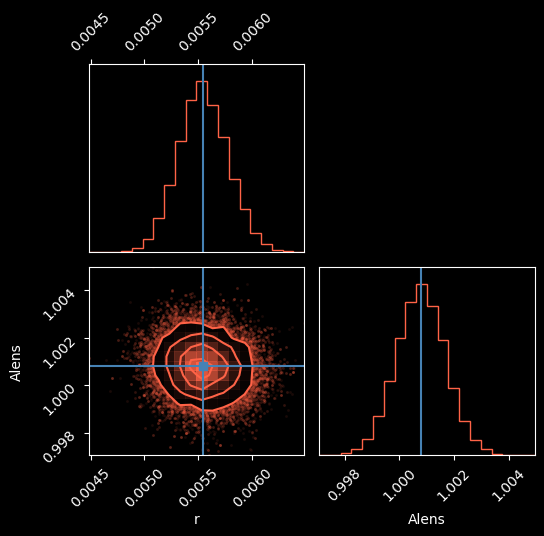

In [48]:
r_min = 0
r_max = 1
Alens_min = 0
Alens_max = 2

r_mean = r0
r_sigma = 0.001
Alens_mean = Alens0
Alens_sigma = 0.001

def prior(p):
    r, Alens = p
    r_pdf = scipy.stats.norm.pdf(r, loc=r_mean, scale=r_sigma)
    Alens_pdf = scipy.stats.norm.pdf(Alens, loc=Alens_mean, scale=Alens_sigma)
    if r_min <= r <= r_max and Alens_min <= Alens <= Alens_max:
        return  r_pdf * Alens_pdf 
    else:
        return -np.inf 
    
def like(p, clLens):
    r, Alens = p
    clTh = r * clTensor / r0 + Alens * clLens / Alens0 + noise_level
    
    clTh_binned = b.bin_cell(clTh)
    ell_binned = b.get_effective_ells()
    
    sum_term = -fsky * delta_ell * np.sum((2 * ell_binned + 1) * ((clBB_Nmt / clTh_binned) + np.log(clTh_binned)))
    return sum_term



def prob(p, clLens):   # Posterior 
    lp = prior(p)
    if not np.isfinite(lp):
        return -np.inf
    return np.log(lp+1e-40)  + like(p, clLens)


Nwalker, Ndim =  50, 2
p0 = np.zeros((Nwalker, Ndim))
p0[:, 0] = np.random.uniform(r_min, r_max, size=Nwalker)
p0[:, 1] = np.random.uniform(Alens_min, Alens_max, size=Nwalker)

sampler = emcee.EnsembleSampler(Nwalker, Ndim, prob, args=(clLens,))
pos, prob, state = sampler.run_mcmc(p0, 500)

sampler.reset()
pos, prob, state = sampler.run_mcmc(pos, 1000)

optimal_rMasked, optimal_AlensMasked = np.median(sampler.flatchain, axis=0)

tmp = corner.corner(sampler.flatchain,top_ticks = True, labels=['r', 'Alens'], truths=[optimal_rMasked, optimal_AlensMasked], color = 'tomato')
plt.tight_layout()

optimal_rMasked, optimal_AlensMasked

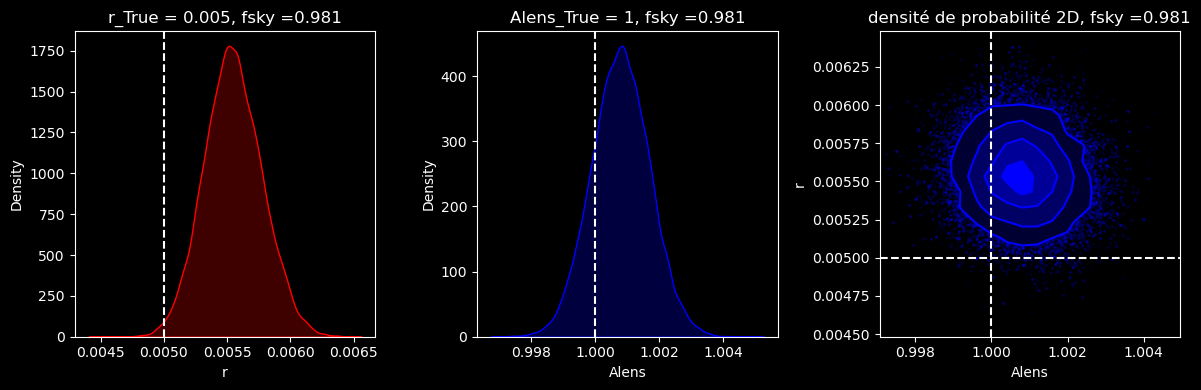

In [49]:
r_samplesMasked = sampler.flatchain[:, 0] 
Alens_samplesMasked = sampler.flatchain[:, 1]

fig, axes = plt.subplots(1, 3, figsize=(12, 4))  

# for r
axes[0].set_title("r_True = 0.005, fsky ="+str("%.3f" % fsky))
sns.kdeplot(r_samplesMasked, color='red', fill=True, ax=axes[0])
axes[0].axvline(x=r0, color='white', linestyle='--')
axes[0].set_xlabel('r')
axes[0].set_ylabel('Density')

# for Alens
axes[1].set_title("Alens_True = 1, fsky ="+str("%.3f" % fsky))
sns.kdeplot(Alens_samplesMasked, color='blue', fill=True, ax=axes[1])
axes[1].axvline(x=Alens0, color='white', linestyle='--')
axes[1].set_xlabel('Alens')
axes[1].set_ylabel('Density')

#  2D
axes[2].set_title("densité de probabilité 2D, fsky ="+str("%.3f" % fsky))
corner.hist2d(Alens_samplesMasked, r_samplesMasked, fill_contours=True, labels=['r', 'As'], truths=[optimal_r, optimal_Alens], color='blue', ax=axes[2])
axes[2].axvline(x=Alens0, color='white', linestyle='--')
axes[2].axhline(y=r0, color='white', linestyle='--')
axes[2].set_xlabel('Alens')
axes[2].set_ylabel('r')
plt.tight_layout()

plt.show()

Evolution of estimates when fsky changes : 
-----------------------------

0.005685952726632361 1.000525568441856


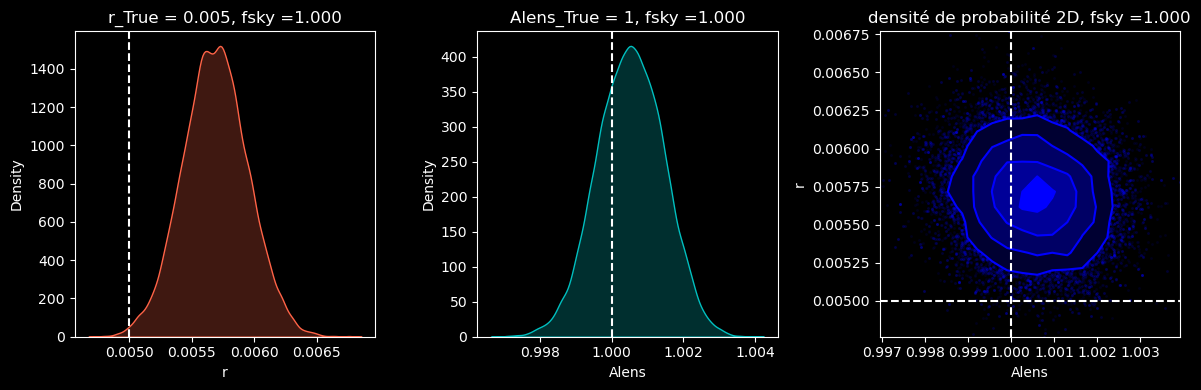

0.005578368973721506 1.0006153095462536


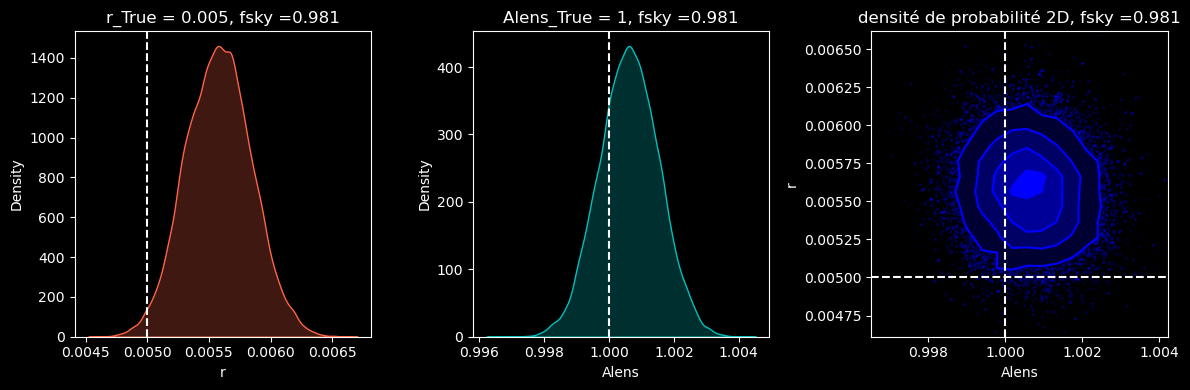

0.0054374504238959235 1.0005783595770574


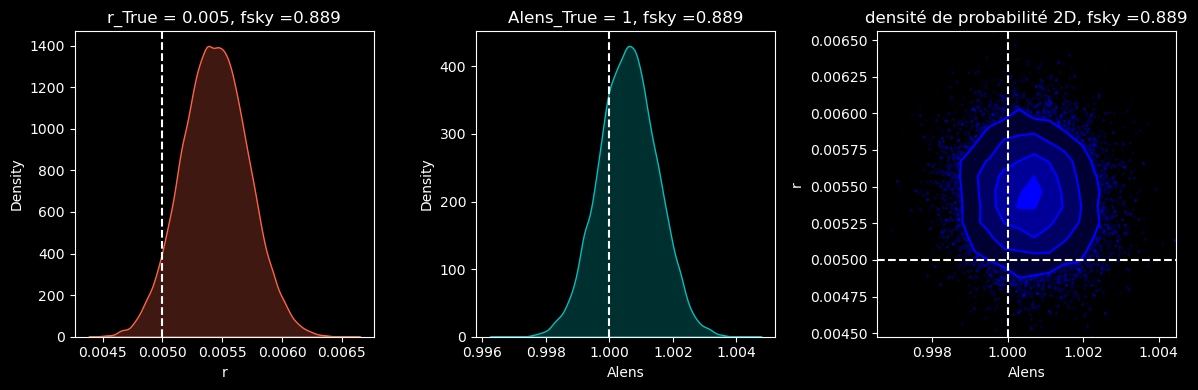

0.005515707861437497 1.0004578315317205


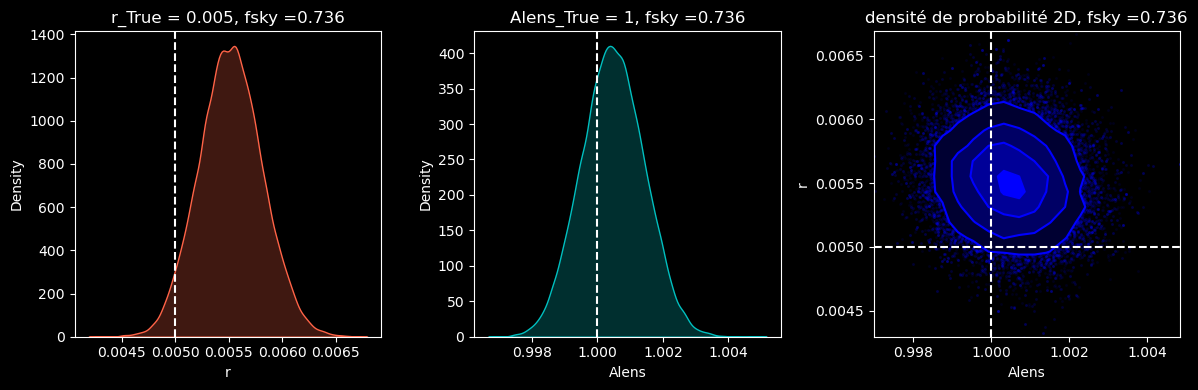

0.005300078127491226 1.0003810278735124


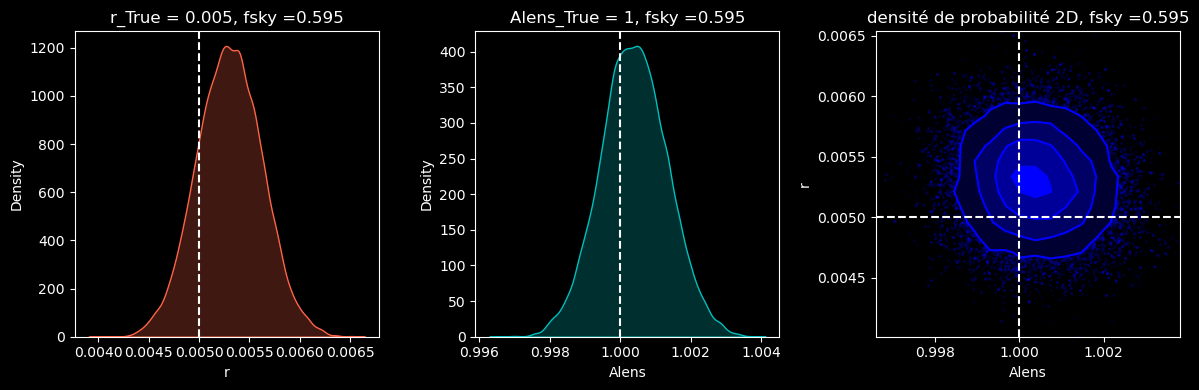

0.005302860224879975 1.0002209777318374


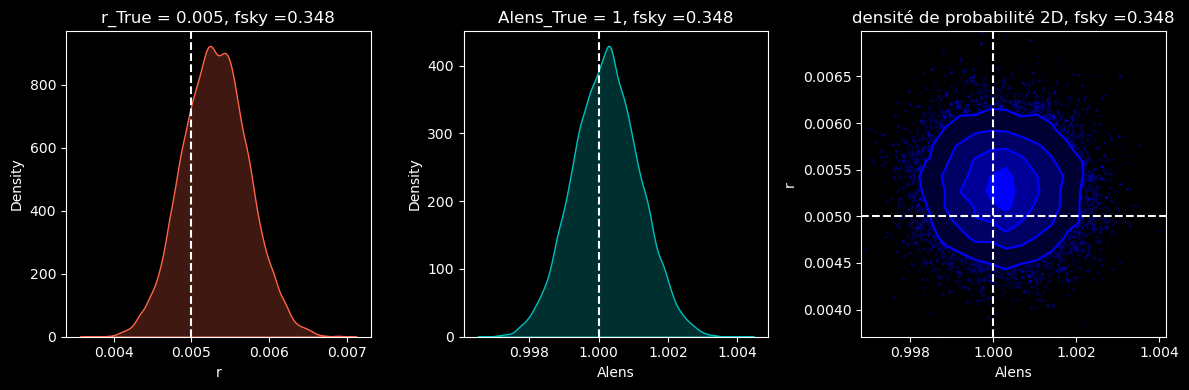

0.004855234215922176 1.0002240181573978


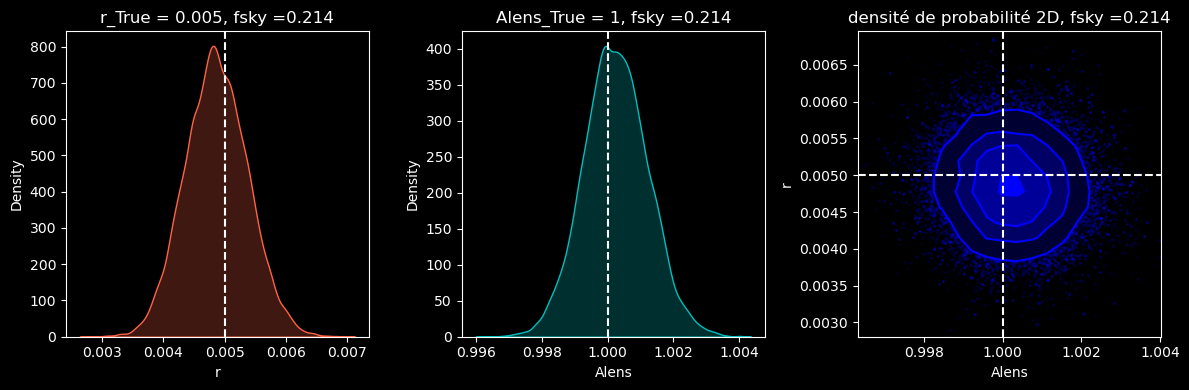

0.0033763720886288776 0.9999223558959154


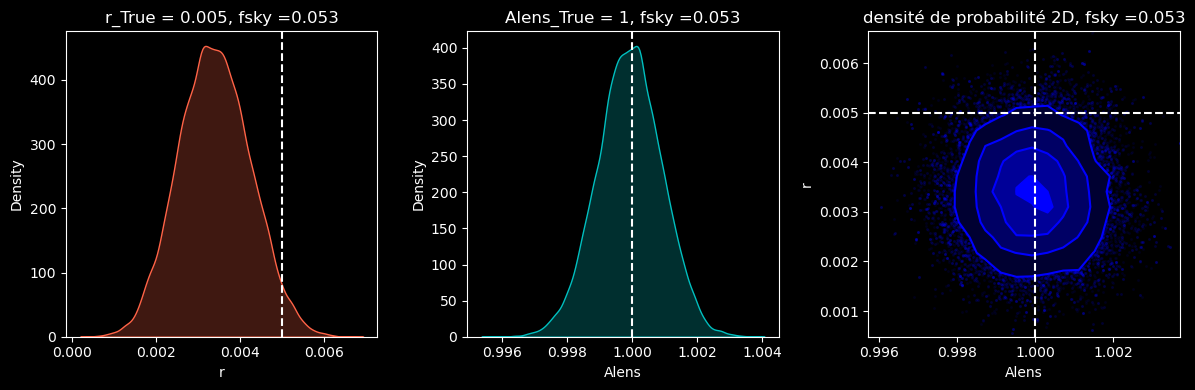

In [52]:
mask_radius = [0,0.1,0.5,0.9,1.2,1.7,2,2.5]

for i in mask_radius : 
    lon, lat = hp.pix2ang(nside, np.arange(hp.nside2npix(nside)))
    mask_center_lon, mask_center_lat = 0, 0
    mask_indices = hp.query_disc(nside, hp.ang2vec(mask_center_lon, mask_center_lat, lonlat=True), i)
    mask = np.ones(hp.nside2npix(nside))
    mask[mask_indices] = 0
    mask = nmt.mask_apodization(mask, aposcale, apotype="Smooth")
    fsky = np.sum(mask) / hp.nside2npix(nside)
    f0 = nmt.NmtField(mask, [maps_with_noise[0]])   # champ spin 0
    f2 = nmt.NmtField(mask, [maps_with_noise[1], maps_with_noise[2]],  purify_b= True )  # champ spin 2 
    nlb = 4
    b = nmt.NmtBin(nside, nlb = nlb, lmax = lmax)
    cl_00 = nmt.compute_full_master(f0,f0,b)
    cl_02 = nmt.compute_full_master(f0,f2,b)
    cl_22 = nmt.compute_full_master(f2,f2,b)
    ell_arr = b.get_effective_ells()
    clBB_Nmt = cl_22[3] 
    r_min = 0
    r_max = 1
    Alens_min = 0
    Alens_max = 2
    r_mean = r0
    r_sigma = 0.001
    Alens_mean = Alens0
    Alens_sigma = 0.001
    def prior(p):
        r, Alens = p
        r_pdf = scipy.stats.norm.pdf(r, loc=r_mean, scale=r_sigma)
        Alens_pdf = scipy.stats.norm.pdf(Alens, loc=Alens_mean, scale=Alens_sigma)
        if r_min <= r <= r_max and Alens_min <= Alens <= Alens_max:
            return  r_pdf * Alens_pdf 
        else:
            return -np.inf 
    def like(p, clLens):
        r, Alens = p
        clTh = r * clTensor / r0 + Alens * clLens / Alens0 + noise_level
        clTh_binned = b.bin_cell(clTh)
        ell_binned = b.get_effective_ells()
        sum_term = -fsky * delta_ell * np.sum((2 * ell_binned + 1) * ((clBB_Nmt / clTh_binned) + np.log(clTh_binned)))
        return sum_term
    def prob(p, clLens):   # Posterior 
        lp = prior(p)
        if not np.isfinite(lp):
            return -np.inf
        return np.log(lp+1e-40)  + like(p, clLens)
    Nwalker, Ndim =  50, 2
    p0 = np.zeros((Nwalker, Ndim))
    p0[:, 0] = np.random.uniform(r_min, r_max, size=Nwalker)
    p0[:, 1] = np.random.uniform(Alens_min, Alens_max, size=Nwalker)
    sampler = emcee.EnsembleSampler(Nwalker, Ndim, prob, args=(clLens,))
    pos, prob, state = sampler.run_mcmc(p0, 500)
    sampler.reset()
    pos, prob, state = sampler.run_mcmc(pos, 1000)
    optimal_rMasked, optimal_AlensMasked = np.median(sampler.flatchain, axis=0)
    print(optimal_rMasked, optimal_AlensMasked)
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))  
    r_samplesMasked = sampler.flatchain[:, 0] 
    Alens_samplesMasked = sampler.flatchain[:, 1]
    axes[0].set_title("r_True = 0.005, fsky ="+str("%.3f" % fsky))
    sns.kdeplot(r_samplesMasked, color='tomato', fill=True, ax=axes[0])
    axes[0].axvline(x=r0, color='white', linestyle='--')
    axes[0].set_xlabel('r')
    axes[0].set_ylabel('Density')
    axes[1].set_title("Alens_True = 1, fsky ="+str("%.3f" % fsky))
    sns.kdeplot(Alens_samplesMasked, color='c', fill=True, ax=axes[1])
    axes[1].axvline(x=Alens0, color='white', linestyle='--')
    axes[1].set_xlabel('Alens')
    axes[1].set_ylabel('Density')
    axes[2].set_title("densité de probabilité 2D, fsky ="+str("%.3f" % fsky))
    corner.hist2d(Alens_samplesMasked, r_samplesMasked, fill_contours=True, labels=['r', 'As'], truths=[optimal_r, optimal_Alens], color='blue', ax=axes[2])
    axes[2].axvline(x=Alens0, color='white', linestyle='--')
    axes[2].axhline(y=r0, color='white', linestyle='--')
    axes[2].set_xlabel('Alens')
    axes[2].set_ylabel('r')
    plt.tight_layout()
    plt.show()

Hamimeche & Lewis Likelihood : 
----------------------------

In [27]:
def hl_compute_offsets(ell, varcl, clref, fsky=1.0, iter=10):
    Nl = np.sqrt(np.abs(varcl - (2.0 / (2.0 * ell + 1) * clref ** 2)  / fsky))
    for i in range(iter):
        Nl = np.sqrt(np.abs(varcl - 2.0 / (2.0 * ell + 1) / fsky * (clref ** 2 + 2.0 * Nl * clref)))
    return Nl * np.sqrt((2.0 * ell + 1) / 2.0)

def hl_ghl(x):
    return np.sign(x - 1) * np.sqrt(2.0 * (x - np.log(x) - 1))


fskyeff = np.mean(mask)
ell = np.arange(513)
cloff = hl_compute_offsets(ell, np.diag(cov),clBB , fsky=fskyeff)

voc = np.linalg.inv(cov)

x = (cl + cloff)/(model + cloff)
g = np.sign(x) * hl_ghl(np.abs(x))
X = (np.sqrt(clfid + cloff)) * g * (np.sqrt(clfid + cloff))
chi2 = X @ voc @ X

ValueError: Input must be 1- or 2-d.